##Cardiac Arrest Prediction Project - Model Deployment using Flask API

##Done By: Ashwath Bala S

##Table of Contents:

1. Problem Statement
2. Importing the Required Libraries
3. Setting up Front-End
4. Setting up Backend and Deploy on Colab


##1. Problem Statement

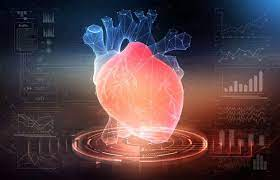

The aim of this project (A Project on Model Deployment using Flask API) is to build a Machine Learning Project to predict the chances of Cardiac Arrest based on the physical and demographic features of a person and deploy it using Flask API

##2. Importing the Required Libraries

In [1]:
# Flask along with ngrok
# As a colab dependency
!pip install -q flask-ngrok

##3. Setting Up Front-End

In [ ]:
# Created a folder for HTML/CSS files
!mkdir templates

mkdir: cannot create directory ‘templates’: File exists


In [ ]:
# Commented in order to display the code in GitHub

# ## Creating a home page for website
# %%writefile templates/index.html

# <!DOCTYPE html>
# <html lang="en">
#   <head>
#     <meta charset="UTF-8" />
#     <title>Cardiac Arrest Prediction</title>
#   </head>
#   <body>
#     <h1>Cardiac Arrest Prediction</h1>
#     <form action="{{url_for('predict')}}" method="POST">
#       <table style="border: 0px; width:100%">
#         <tr>
#           <td class="select" style="width: 30%;">Select Gender</td>
#           <td style="width: 70%;">
#             <select name="gender" id="gender">
#               <option value="Male">Male</option>
#               <option value="Female">Female</option>
#             </select>
#           </td>
#         </tr>
#         <tr>
#           <td style="width: 30%;">Height (in cm)</td>
#           <td align="left" style="width: 70%;">
#             <input
#               style="width:60%"
#               name="height"
#               size="25"
#               maxlength="25"
#               type="text"
#             />
#           </td>
#         </tr>
#         <tr>
#           <td style="width: 30%;">Weight (in kg)</td>
#           <td align="left" style="width: 70%;">
#             <input
#               style="width:60%"
#               name="weight"
#               size="25"
#               maxlength="25"
#               type="text"
#             />
#           </td>
#         </tr>
#         <tr>
#           <td class="select" style="width: 30%;">Are you a smoker?</td>
#           <td style="width: 70%;">
#             <select name="smoke" id="smoke">
#               <option value="Yes">Yes</option>
#               <option value="No">No</option>
#             </select>
#           </td>
#         </tr>
#         <tr>
#           <td class="select" style="width: 30%;">
#             Do you drink Alcohol frequently?
#           </td>

#           <td style="width: 70%;">
#             <select name="alcohol" id="alcohol">
#               <option value="Yes">Yes</option>
#               <option value="No">No</option>
#             </select>
#           </td>
#         </tr>
#       </table>
#       <input
#         type="submit"
#         value="submit"
#         style="border: 0px; width: 90px; height: 40px; background: blue; color: white; font-size: 16px; margin-top: 30px;"
#       />
#     </form>
#     <br />
#     {{prediction_text}}
#   </body>
# </html>

In [ ]:
## Creating a home page for website
%%writefile templates/index.html

<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <title>Cardiac Arrest Prediction</title>
  </head>
  <body>
    <h1>Cardiac Arrest Prediction</h1>
    <form action="{{url_for('predict')}}" method="POST">
      <table style="border: 0px; width:100%">
        <tr>
          <td class="select" style="width: 30%;">Select Gender</td>
          <td style="width: 70%;">
            <select name="gender" id="gender">
              <option value="Male">Male</option>
              <option value="Female">Female</option>
            </select>
          </td>
        </tr>
        <tr>
          <td style="width: 30%;">Height (in cm)</td>
          <td align="left" style="width: 70%;">
            <input
              style="width:60%"
              name="height"
              size="25"
              maxlength="25"
              type="text"
            />
          </td>
        </tr>
        <tr>
          <td style="width: 30%;">Weight (in kg)</td>
          <td align="left" style="width: 70%;">
            <input
              style="width:60%"
              name="weight"
              size="25"
              maxlength="25"
              type="text"
            />
          </td>
        </tr>
        <tr>
          <td class="select" style="width: 30%;">Are you a smoker?</td>
          <td style="width: 70%;">
            <select name="smoke" id="smoke">
              <option value="Yes">Yes</option>
              <option value="No">No</option>
            </select>
          </td>
        </tr>
        <tr>
          <td class="select" style="width: 30%;">
            Do you drink Alcohol frequently?
          </td>

          <td style="width: 70%;">
            <select name="alcohol" id="alcohol">
              <option value="Yes">Yes</option>
              <option value="No">No</option>
            </select>
          </td>
        </tr>
      </table>
      <input
        type="submit"
        value="submit"
        style="border: 0px; width: 90px; height: 40px; background: blue; color: white; font-size: 16px; margin-top: 30px;"
      />
    </form>
    <br />
    {{prediction_text}}
  </body>
</html>

Writing templates/index.html


## 4. Setting up Backend and Deploy on Colab

In [ ]:
# Importing important libraries and modules
import pickle

from flask import Flask, render_template, request  # important flask modules
from flask_ngrok import run_with_ngrok             # ngrok dependency

# Creating flask instance and host it using ngrok
app = Flask(__name__)
run_with_ngrok(app)

# Loading the trained model
pickle_in = open("cardiac_classifier.pkl", "rb")
classifier = pickle.load(pickle_in)

# Creating a function for handling home page request
@app.route("/")
def home():
    return render_template("index.html")

# Creating a function for handling submit button click
@app.route("/predict", methods=["POST"])
def predict():
    # Getting input from user
    features = [[x for x in request.form.values()]]

    ## Pre-processing input
    # Converting  categorical values to numerical
    if features[0][0] == "Male":
        features[0][0] = 0
    else:
        features[0][0] = 1

    # Converting string values to numerical
    features[0][1] = int(features[0][1])
    features[0][2] = int(features[0][2])

    # Converting categorical values to numerical
    if features[0][3] == "Yes":
        features[0][3] = 1
    else:
        features[0][3] = 0

    # Converting categorical values to numerical
    if features[0][4] == "Yes":
        features[0][4] = 1
    else:
        features[0][4] = 0

    # Calling predict function of saved model
    result = classifier.predict_proba(features)[0][0]

    # Showing result to user
    return render_template(
        "index.html",
        prediction_text="Your chances of getting a cardiac arrest are {:.2f} %".format(
            result * 100
        ),
    )

# Running flask app
if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://d8a1d0554cd4.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [31/Mar/2021 11:22:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Mar/2021 11:22:56] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [31/Mar/2021 11:23:45] "POST /predict HTTP/1.1" 200 -


##In this, we have utilized the Machine Model from the pickle file, and performed Model Deployment using Flask API